In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day28-column-transformer/covid_toy.csv')
df.head(5)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [4]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [5]:
df.fever = df.fever.fillna(df.fever.mean())
df.isnull().sum()

age          0
gender       0
fever        0
cough        0
city         0
has_covid    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


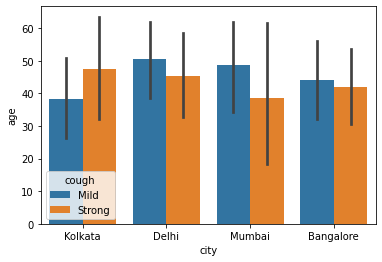

In [6]:
sns.barplot(df.city, df.age,hue=df.cough)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


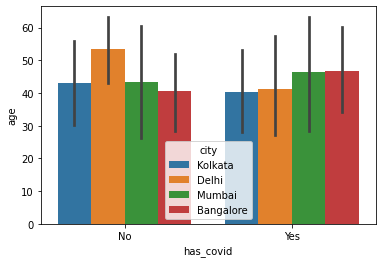

In [7]:
sns.barplot(df.has_covid,df.age,hue=df.city)

In [8]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],
                                                test_size=0.2)

In [9]:
X_train

,age,gender,fever,cough,city
77,8,Female,101.0,Mild,Kolkata
61,81,Female,98.0,Strong,Mumbai
18,64,Female,98.0,Mild,Bangalore
48,66,Male,99.0,Strong,Bangalore
39,50,Female,103.0,Mild,Kolkata
...,...,...,...,...,...
38,49,Female,101.0,Mild,Delhi
83,17,Female,104.0,Mild,Kolkata
76,80,Male,100.0,Mild,Bangalore
47,18,Female,104.0,Mild,Bangalore


## Without using Column transform library

In [10]:
# adding simple imputer to fever col
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data
X_test_fever = si.fit_transform(X_test[['fever']])
                                 
X_train_fever.shape

(80, 1)

In [11]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.transform(X_test[['cough']])

X_train_cough.shape

(80, 1)

In [12]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data
X_test_gender_city = ohe.transform(X_test[['gender','city']])

X_train_gender_city.shape

(80, 4)

In [13]:
# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape

(80, 1)

In [14]:
# now concatenate all the columns that we have encoded
# for train data
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

X_train_transformed.shape

(80, 7)

In [15]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6
0,8.0,101.0,0.0,0.0,1.0,0.0,0.0
1,81.0,98.0,0.0,0.0,0.0,1.0,1.0
2,64.0,98.0,0.0,0.0,0.0,0.0,0.0
3,66.0,99.0,1.0,0.0,0.0,0.0,1.0
4,50.0,103.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
75,49.0,101.0,0.0,1.0,0.0,0.0,0.0
76,17.0,104.0,0.0,0.0,1.0,0.0,0.0
77,80.0,100.0,1.0,0.0,0.0,0.0,0.0
78,18.0,104.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.iloc[75:80]

,age,gender,fever,cough,city,has_covid
75,5,Male,102.0,Mild,Kolkata,Yes
76,80,Male,100.0,Mild,Bangalore,Yes
77,8,Female,101.0,Mild,Kolkata,No
78,11,Male,100.0,Mild,Bangalore,Yes
79,48,Female,103.0,Mild,Kolkata,Yes


In [17]:
pd.DataFrame(X_train_transformed,columns=['age','fever','cough','male','female','banglore','kolkatta'])

,age,fever,cough,male,female,banglore,kolkatta
0,8.0,101.0,0.0,0.0,1.0,0.0,0.0
1,81.0,98.0,0.0,0.0,0.0,1.0,1.0
2,64.0,98.0,0.0,0.0,0.0,0.0,0.0
3,66.0,99.0,1.0,0.0,0.0,0.0,1.0
4,50.0,103.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
75,49.0,101.0,0.0,1.0,0.0,0.0,0.0
76,17.0,104.0,0.0,0.0,1.0,0.0,0.0
77,80.0,100.0,1.0,0.0,0.0,0.0,0.0
78,18.0,104.0,0.0,0.0,0.0,0.0,0.0


## using Column transform library

In [18]:
from sklearn.compose import ColumnTransformer

In [19]:
trans = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [20]:
trans.fit_transform(X_train).shape

(80, 7)

In [21]:
trans.transform(X_test).shape

(20, 7)